In [1]:
import quasar

## Layer 1: The Quasar Circuit Class

### Simple Example: a GHZ Circuit

In [2]:
circuit = quasar.Circuit(N=3).H(0).CX(0,1).CX(1,2)
print(circuit)

T   : |0|1|2|
             
|0> : -H-@---
         |   
|1> : ---X-@-
           | 
|2> : -----X-

T   : |0|1|2|


In [3]:
for key, gate in circuit.gates.items():
    time, qubits = key # Gates are keyed on (time, qubits) pairs
    print('%1d %6s: %2s' % (time, qubits, gate))

0   (0,):  H
1 (0, 1): CX
2 (1, 2): CX


In [4]:
gate = circuit.gate(time=1, qubits=(0,1))
print(gate)
print(gate.name)
print(gate.N)
print(gate.U.real)
print(gate.params)

CX
CX
2
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
OrderedDict()


In [5]:
print(circuit.N)
print(circuit.ngate)
print(circuit.ngate1)
print(circuit.ngate2)
print(circuit.ntime)

3
3
1
2
3


### Next Example: a CIS Circuit

In [6]:
gadget = quasar.Circuit(N=2).Ry(1).CZ(0,1).Ry(1).CX(1,0)
print(gadget)

T   : |0 |1|2 |3|
                 
|0> : ----@----X-
          |    | 
|1> : -Ry-Z-Ry-@-

T   : |0 |1|2 |3|


In [7]:
circuit = quasar.Circuit(N=4)
circuit.Ry(0, theta=0.1)
circuit.add_circuit(gadget, (0,1))
circuit.add_circuit(gadget, (1,2))
circuit.add_circuit(gadget, (2,3))
print(circuit)

T   : |0 |1|2 |3 |4|5 |6 |7|8 |9|
                                 
|0> : -Ry-@----X-----------------
          |    |                 
|1> : -Ry-Z-Ry-@--@----X---------
                  |    |         
|2> : ---------Ry-Z-Ry-@--@----X-
                          |    | 
|3> : -----------------Ry-Z-Ry-@-

T   : |0 |1|2 |3 |4|5 |6 |7|8 |9|


In [8]:
print(circuit.param_str)

Index Time  Qubits     Name       Gate      :                    Value
0     0     (0,)       theta      Ry        :   1.0000000000000001E-01
1     0     (1,)       theta      Ry        :   0.0000000000000000E+00
2     2     (1,)       theta      Ry        :   0.0000000000000000E+00
3     3     (2,)       theta      Ry        :   0.0000000000000000E+00
4     5     (2,)       theta      Ry        :   0.0000000000000000E+00
5     6     (3,)       theta      Ry        :   0.0000000000000000E+00
6     8     (3,)       theta      Ry        :   0.0000000000000000E+00



In [9]:
for key, param in circuit.params.items():
    time, qubits, name = key
    print('%2d %6s %6s: %14.6f' % (time, qubits, name, param))

 0   (0,)  theta:       0.100000
 0   (1,)  theta:       0.000000
 2   (1,)  theta:       0.000000
 3   (2,)  theta:       0.000000
 5   (2,)  theta:       0.000000
 6   (3,)  theta:       0.000000
 8   (3,)  theta:       0.000000


In [10]:
circuit.set_param_values([0.6, 0.5, -0.5, 0.4, -0.4, 0.3, -0.3])
print(circuit.param_str)

Index Time  Qubits     Name       Gate      :                    Value
0     0     (0,)       theta      Ry        :   5.9999999999999998E-01
1     0     (1,)       theta      Ry        :   5.0000000000000000E-01
2     2     (1,)       theta      Ry        :  -5.0000000000000000E-01
3     3     (2,)       theta      Ry        :   4.0000000000000002E-01
4     5     (2,)       theta      Ry        :  -4.0000000000000002E-01
5     6     (3,)       theta      Ry        :   2.9999999999999999E-01
6     8     (3,)       theta      Ry        :  -2.9999999999999999E-01



In [11]:
print(circuit.simulate().real.round(3))

[ 0.825 -0.192  0.281  0.    -0.331  0.     0.     0.     0.305  0.
  0.     0.     0.     0.    -0.     0.   ]


In [12]:
measurement = circuit.measure(nmeasurement=1000)
print(measurement)

|0000> : 678
|0001> :  37
|0010> :  85
|0100> :  98
|1000> : 102



In [13]:
for ket, count in measurement.items():
    print('%5s : %3d' % (ket, count))

 0000 : 678
 0001 :  37
 0010 :  85
 0100 :  98
 1000 : 102


In [14]:
print(ket[0])
print(ket[1])
print(ket[2])
print(ket[3])

1
0
0
0


## Layer 2: Backends, Statevectors, Measurements, and Paulis

In [15]:
quasar_circuit = quasar.Circuit(N=3).H(0).CX(0,1).CX(1,2)
print(quasar_circuit)

T   : |0|1|2|
             
|0> : -H-@---
         |   
|1> : ---X-@-
           | 
|2> : -----X-

T   : |0|1|2|


In [16]:
quasar_backend = quasar.QuasarSimulatorBackend()
print(quasar_backend)
print(quasar_backend.summary_str)
print(quasar_backend.has_statevector)
print(quasar_backend.has_measurement)
print(quasar_backend.native_circuit_type)

Quasar Simulator Backend (Statevector)
Quasar: An Ultralite Quantum Circuit Simulator
   By Rob Parrish (rob.parrish@qcware.com)    
True
True
<class 'quasar.circuit.Circuit'>


In [17]:
qiskit_backend = quasar.QiskitSimulatorBackend()
print(qiskit_backend)
print(qiskit_backend.summary_str)
print(qiskit_backend.has_statevector)
print(qiskit_backend.has_measurement)
print(qiskit_backend.native_circuit_type)

Qiskit Simulator Backend
Qiskit Simulator Backend
True
True
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>


/anaconda3/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


In [18]:
cirq_backend = quasar.CirqSimulatorBackend()
print(cirq_backend)
print(cirq_backend.summary_str)
print(cirq_backend.has_statevector)
print(cirq_backend.has_measurement)
print(cirq_backend.native_circuit_type)

Cirq Simulator Backend
Cirq Simulator Backend
True
True
<class 'cirq.circuits.circuit.Circuit'>


In [19]:
qiskit_circuit = quasar.build_native_circuit(qiskit_backend, quasar_circuit)
print(qiskit_circuit)

         ┌───┐          
q0_0: |0>┤ H ├──■───────
         └───┘┌─┴─┐     
q0_1: |0>─────┤ X ├──■──
              └───┘┌─┴─┐
q0_2: |0>──────────┤ X ├
                   └───┘


In [20]:
cirq_circuit = quasar.build_native_circuit(cirq_backend, quasar_circuit)
print(cirq_circuit)

0: ───H───@───────
          │
1: ───────X───@───
              │
2: ───────────X───


In [21]:
print(quasar.build_quasar_circuit(cirq_circuit))

T   : |0|1|2|
             
|0> : -H-@---
         |   
|1> : ---X-@-
           | 
|2> : -----X-

T   : |0|1|2|


In [22]:
circuits = [quasar_circuit, qiskit_circuit, cirq_circuit]
backends = [quasar_backend, qiskit_backend, cirq_backend]

In [23]:
for backend in backends:
    for circuit in circuits:
        print(quasar.run_statevector(backend, circuit).real.round(3))

[0.707 0.    0.    0.    0.    0.    0.    0.707]
[0.707 0.    0.    0.    0.    0.    0.    0.707]
[0.707 0.    0.    0.    0.    0.    0.    0.707]
[0.707 0.    0.    0.    0.    0.    0.    0.707]
[0.707 0.    0.    0.    0.    0.    0.    0.707]
[0.707 0.    0.    0.    0.    0.    0.    0.707]
[ 0.707  0.     0.     0.    -0.    -0.    -0.     0.707]
[ 0.707  0.     0.     0.    -0.    -0.    -0.     0.707]
[ 0.707  0.     0.     0.    -0.    -0.    -0.     0.707]


/anaconda3/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


In [24]:
for backend in backends:
    for circuit in circuits:
        print(quasar.run_measurement(backend, circuit, nmeasurement=1000))

|000> : 497
|111> : 503

|000> : 486
|111> : 514

|000> : 521
|111> : 479

|000> : 494
|111> : 506

|000> : 516
|111> : 484

|000> : 501
|111> : 499

|000> : 501
|111> : 499

|000> : 479
|111> : 521

|000> : 517
|111> : 483



In [25]:
I, X, Y, Z = quasar.Pauli.IXYZ()
pauli = I + Z[0] + Z[1] + Z[2] 
pauli += Z[0] * Z[1] + Z[1] * Z[2] 
pauli += Z[0] * Z[1] * Z[2]
print(pauli)

+1.0*I
+1.0*Z0
+1.0*Z1
+1.0*Z2
+1.0*Z0*Z1
+1.0*Z1*Z2
+1.0*Z0*Z1*Z2


In [26]:
print(quasar.run_pauli_expectation(qiskit_backend, quasar_circuit, pauli, nmeasurement=None))

+1.0*I
+2.220446049250313e-16*Z0
+2.220446049250313e-16*Z1
+2.220446049250313e-16*Z2
+1.0*Z0*Z1
+1.0*Z1*Z2
+2.220446049250313e-16*Z0*Z1*Z2


In [27]:
print(quasar.run_pauli_expectation(qiskit_backend, quasar_circuit, pauli, nmeasurement=1000))

+1.0*I
+0.034*Z0
+0.034*Z1
+0.034*Z2
+1.0*Z0*Z1
+1.0*Z1*Z2
+0.034*Z0*Z1*Z2


## Layer 3: Gradients, Hessians, and Tomography

In [28]:
circuit = quasar.Circuit(N=2).Ry(0, theta=0.1)
circuit.Ry(1, theta=-0.2).CZ(0,1).Ry(1, theta=+0.2).CX(1,0)
circuit.Ry(0, theta=0.0).Ry(1, theta=0.0)
print(circuit)
print('')
print(circuit.param_str)

T   : |0 |1|2 |3|4 |
                    
|0> : -Ry-@----X-Ry-
          |    |    
|1> : -Ry-Z-Ry-@-Ry-

T   : |0 |1|2 |3|4 |

Index Time  Qubits     Name       Gate      :                    Value
0     0     (0,)       theta      Ry        :   1.0000000000000001E-01
1     0     (1,)       theta      Ry        :  -2.0000000000000001E-01
2     2     (1,)       theta      Ry        :   2.0000000000000001E-01
3     4     (0,)       theta      Ry        :   0.0000000000000000E+00
4     4     (1,)       theta      Ry        :   0.0000000000000000E+00



In [29]:
pauli = I - 0.4 * Z[0] - 0.5 * Z[1]
pauli += 0.1 * X[0] * X[1] + 0.2 * X[0] * Z[1] + 0.3 * X[1] * Z[0] + 0.4 * Z[0] * Z[1]
print(pauli)

+1.0*I
-0.4*Z0
-0.5*Z1
+0.1*X0*X1
+0.2*X0*Z1
+0.3*X1*Z0
+0.4*Z0*Z1


In [30]:
nmeasurement = 1000
backend = quasar.QuasarSimulatorBackend()

In [31]:
value = quasar.run_observable_expectation_value(
    backend, circuit, pauli, nmeasurement=nmeasurement)
print(value)

0.5734


In [32]:
gradient = quasar.run_observable_expectation_value_gradient(
    backend, circuit, pauli, nmeasurement=nmeasurement, param_indices=[3,4])
print(gradient)

[0.4023 0.6544]


In [33]:
hessian = quasar.run_observable_expectation_value_hessian(
    backend, circuit, pauli, nmeasurement=nmeasurement, param_indices1=[3,4], param_indices2=[3,4])
print(hessian)

[[-0.2213  0.0897]
 [ 0.0897  0.1673]]


In [34]:
tomography = quasar.run_observable_expectation_value_tomography(
    backend, circuit, pauli, nmeasurement=nmeasurement, param_indices=[3,4])
print(tomography)

In [35]:
T = quasar.RotationTomography.quad_x(tomography.nparam)
print(T)

[[[-1.04719755 -1.04719755 -1.04719755]
  [ 0.          0.          0.        ]
  [ 1.04719755  1.04719755  1.04719755]]

 [[-1.04719755  0.          1.04719755]
  [-1.04719755  0.          1.04719755]
  [-1.04719755  0.          1.04719755]]]


In [36]:
import numpy as np
params = np.array(np.meshgrid(*([np.linspace(-np.pi / 2.0, +np.pi / 2.0, 50)]*2), indexing='ij'))
O = tomography.compute_observable_expectation_value(params)

In [37]:
params_0 = tomography.optimize_jacobi_1(d=0)
params_1 = tomography.optimize_jacobi_1(d=1)
params_opt = tomography.optimize_jacobi_1_best()
print(params_opt[:,-1])

[-0.06055379 -0.70395611]


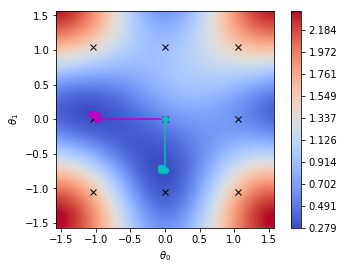

In [38]:
import matplotlib.pyplot as plt
levels = np.linspace(np.min(O), np.max(O), 100)
plt.clf()
plt.contourf(params[0], params[1], O, levels, cmap=plt.get_cmap('coolwarm'))
plt.plot(T[0], T[1], 'kx')
plt.plot(params_0[0], params_0[1], 'm-o')
plt.plot(params_1[0], params_1[1], 'c-o')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.axis('square')
plt.colorbar()
plt.show()

In [39]:
params2 = circuit.param_values
params2[3:] = params_opt[:,-1]
circuit.set_param_values(params2)
value = quasar.run_observable_expectation_value(
    backend, circuit, pauli, nmeasurement=nmeasurement)
print(value)

0.2845000000000001
